<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/smallResnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Reshape,LeakyReLU,Dropout,Conv2DTranspose, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, )
from tensorflow.keras.optimizers import Adam


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
len(train_images), len(test_images)

(50000, 10000)

In [4]:
import matplotlib.pyplot as plt

def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(8, 8))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)  # This line should be indented
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

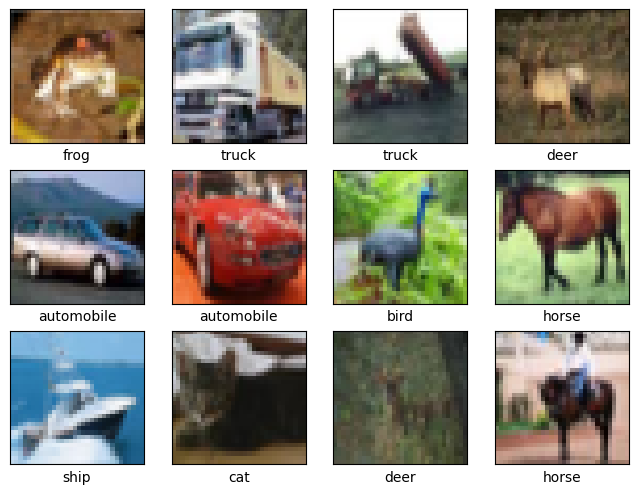

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [6]:
NUM_CLASSES = len(class_names)
NUM_CLASSES

10

In [7]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [8]:
print(np.shape(train_images))
print(np.shape(test_images))

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [10]:
np.shape(train_labels)

(50000, 10)

In [11]:
np.shape(test_labels)

(10000, 10)

In [12]:
from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
INPUT_SHAPE = (32, 32, 3)

In [13]:
from tensorflow.keras import layers
x = layers.Input(shape=INPUT_SHAPE, name="input")

skip_connection_1 = x

conv_layer1 = tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), padding="same", strides=1, name="conv_1")(x)
norm_layer1 = tf.keras.layers.BatchNormalization(name="norm_1")(conv_layer1)
activ_layer1 = tf.keras.layers.LeakyReLU(name="leakyrelu_1")(norm_layer1)
#Leaky Rectified Linear Unit, or Leaky ReLU, is a type of activation function based on a ReLU,
#but it has a small slope for negative values instead of a flat slope.
#The slope coefficient is determined before training, i.e. it is not learnt during training.

skip_connection_1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(1,1), padding="same", strides=1, name="res1")(skip_connection_1)
print("skip connection shape " , np.shape(skip_connection_1))

conv_layer2 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", strides=1, name="conv_2")(activ_layer1)
norm_layer2 = tf.keras.layers.BatchNormalization(name="norm_2")(conv_layer2)
print("skip to be added to " ,np.shape(norm_layer2))
norm_layer2_added = Add()([norm_layer2, skip_connection_1])
activ_layer2 = tf.keras.layers.LeakyReLU(name="activ_layer_2")(norm_layer2_added)

flatten_layer = tf.keras.layers.Flatten()(activ_layer2)

dense_1 = Dense(32, activation='relu')(flatten_layer)
out_final = Dense(NUM_CLASSES, activation='softmax')(dense_1)
model = tf.keras.models.Model(x, out_final, name="my_resnet_model")

skip connection shape  (None, 32, 32, 8)
skip to be added to  (None, 32, 32, 8)


In [14]:
out_final

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_10>

In [15]:
model.summary()

Model: "my_resnet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_1 (Conv2D)           │ (None, 32, 32, 4)      │            112 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ norm_1                    │ (None, 32, 32, 4)      │             16 │ conv_1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leakyrelu_1 (LeakyReLU)   │ (None, 32, 32, 4)      │              0 │ norm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_2 (Conv2D)           │ (None, 32, 32, 8)      │            296 │ leakyrelu_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ norm_2                    │ (None, 32, 32, 8)      │             32 │ conv_2[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res1 (Conv2D)             │ (None, 32, 32, 8)      │             32 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 8)      │              0 │ norm_2[0][0],          │
│                           │                        │                │ res1[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activ_layer_2 (LeakyReLU) │ (None, 32, 32, 8)      │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 8192)           │              0 │ activ_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │        262,176 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 10)             │            330 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 262,994 (1.00 MB)

 Trainable params: 262,970 (1.00 MB)

 Non-trainable params: 24 (96.00 B)

In [16]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 128
EPOCHS = 10

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

print (np.shape(train_images))
print (np.shape(train_labels))


# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels))

(50000, 32, 32, 3)
(50000, 10)
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.3162 - loss: 1.8930 - precision: 0.5666 - recall: 0.1025 - val_accuracy: 0.3859 - val_loss: 1.7039 - val_precision: 0.6517 - val_recall: 0.1190
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4972 - loss: 1.3886 - precision: 0.6790 - recall: 0.2987 - val_accuracy: 0.4968 - val_loss: 1.4031 - val_precision: 0.6580 - val_recall: 0.3165
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5414 - loss: 1.2720 - precision: 0.7126 - recall: 0.3567 - val_accuracy: 0.5130 - val_loss: 1.3579 - val_precision: 0.6627 - val_recall: 0.3603
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5809 - loss: 1.1773 - precision: 0.7389 - recall: 0.4106 - val_accuracy: 0.5082 - val_loss: 1.3891 - val_precision: 0.6473 - val_recall: 0.3691
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6109 - loss: 1.0976 - precision: 0.7587 - recall: 0.4511 - va

In [17]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

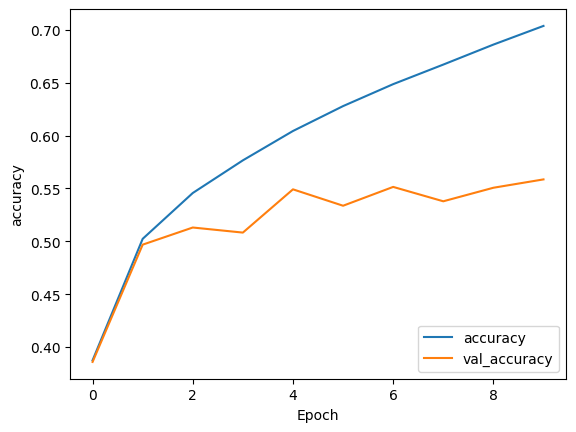

In [18]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

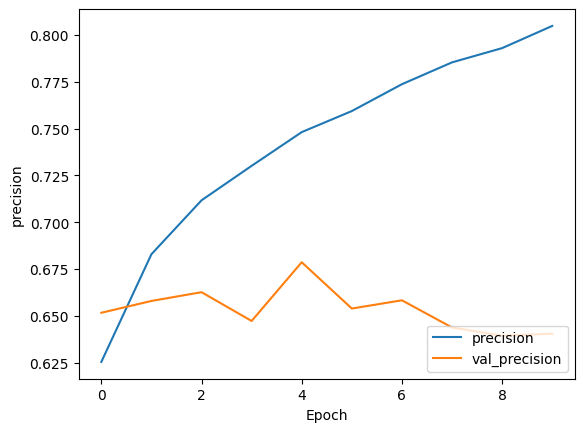

In [19]:
show_performance_curve(training_history, 'precision', 'precision')

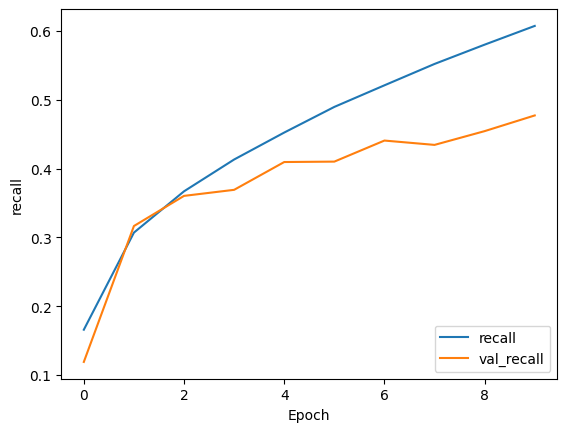

In [20]:
show_performance_curve(training_history, 'recall', 'recall')

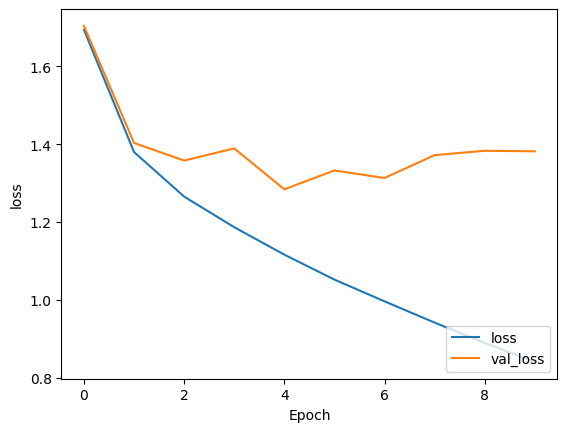

In [21]:
show_performance_curve(training_history, 'loss', 'loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


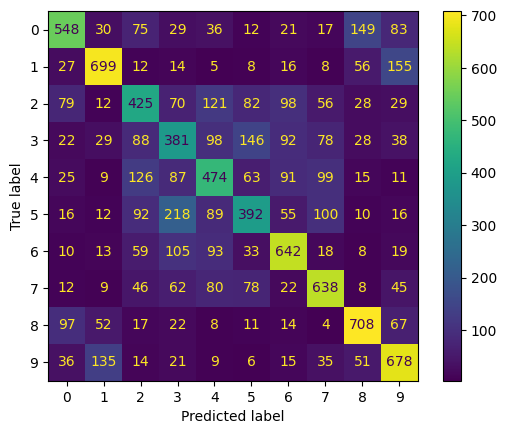

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()